# **Tugas**

1. Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

2. Anda diperbolehkan melakukan eksplorasi terhadap,
  * Metode pra pengolahan
  * Pemilihan fitur
  * Arsitektur ANN
  * Fungsi Aktiviasi

3. ANN diimplementasikan dengan menggunakan tensorflow.

4. DIKERJAKAN SECARA BERKELOMPOK

5. JELASKAN HASIL YANG ANDA DAPATKAN,
  * AKURASI
  * CONFUSION MATRIX
  * KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

* Import library

In [56]:
import cv2   # it will allow us to load our images into the script
import numpy as np   # used for reformatting our own images
import tensorflow as tf   # main library used to load data sets, build neural networks, train them, etc.
import matplotlib.pyplot as plt   # used for visualization
from collections import Counter

* Download dataset mnist

In [57]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


* Data preparation

Counter({1: 7877, 7: 7293, 3: 7141, 2: 6990, 9: 6958, 0: 6903, 6: 6876, 8: 6825, 4: 6824, 5: 6313})


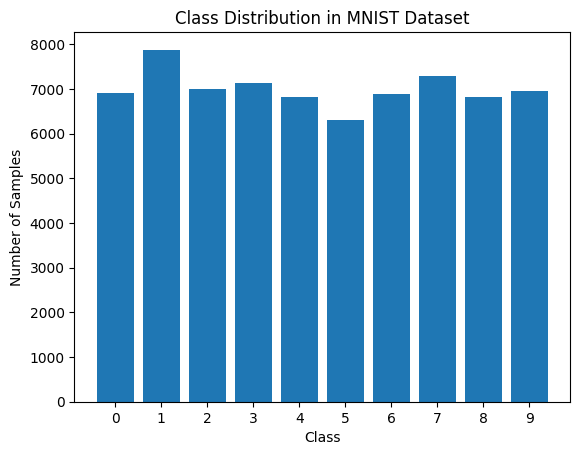

In [58]:
# Extract features and labels
x, y = mnist.data, mnist.target.astype(int)

# Count the Class Frequencies
class_counts = Counter(y)
print(class_counts)

# Convert class_counts to a list of counts for each class
counts = [class_counts[i] for i in range(10)]

# Define class labels
class_labels = [str(i) for i in range(10)]

# Create a bar chart
plt.bar(class_labels, counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

* Split data


In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [60]:
print('The shape of the training inputs:', x_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',x_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (56000, 784)
The shape of the training labels: (56000,)
The shape of the testing inputs: (14000, 784)
The shape of the testing labels: (14000,)


* Print 10 first image

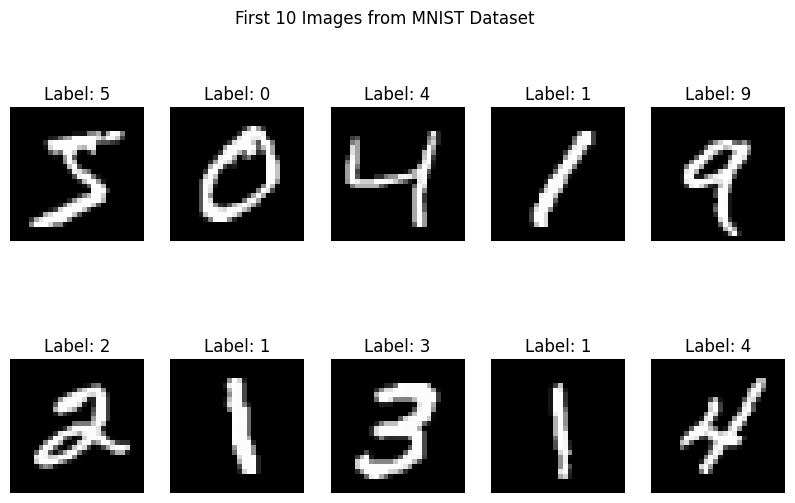

In [61]:
# Convert x to a NumPy array
x_convert = x.values.astype(int)

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns, and i+1-th subplot
    plt.imshow(x_convert[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')  # Turn off axis labels

plt.suptitle('First 10 Images from MNIST Dataset')
plt.show()

* Normalize the data

In [62]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

* Prepocess the data

In [63]:
# Normalize the pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

* Building Model ANN

In [64]:
model = tf.keras.models.Sequential()

* Build layer

In [65]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))  # 10 classes for MNIST

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Compiling Model

Before we start training and testing our model, we need to compile it first. This optimizes it and we can also choose a loss function.

An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.

In [67]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [70]:
model.fit(x_train, y_train, epochs=25, batch_size=100, validation_data=(x_test, y_test))

Epoch 1/25
560/560 [==============================] - 3s 5ms/step - loss: 0.3313 - accuracy: 0.9039 - val_loss: 0.3354 - val_accuracy: 0.9010
Epoch 2/25
560/560 [==============================] - 3s 6ms/step - loss: 0.3209 - accuracy: 0.9060 - val_loss: 0.3261 - val_accuracy: 0.9036
Epoch 3/25
560/560 [==============================] - 3s 5ms/step - loss: 0.3118 - accuracy: 0.9086 - val_loss: 0.3152 - val_accuracy: 0.9080
Epoch 4/25
560/560 [==============================] - 2s 4ms/step - loss: 0.3044 - accuracy: 0.9101 - val_loss: 0.3199 - val_accuracy: 0.9046
Epoch 5/25
560/560 [==============================] - 2s 4ms/step - loss: 0.2964 - accuracy: 0.9132 - val_loss: 0.3026 - val_accuracy: 0.9137
Epoch 6/25
560/560 [==============================] - 2s 4ms/step - loss: 0.2889 - accuracy: 0.9151 - val_loss: 0.2981 - val_accuracy: 0.9146
Epoch 7/25
560/560 [==============================] - 4s 6ms/step - loss: 0.2829 - accuracy: 0.9165 - val_loss: 0.2994 - val_accuracy: 0.9119
Epoch 

* Model Evaluation

In [69]:
# Prediction
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

438/438 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.9005
0.3469269275665283
0.9004999995231628


438/438 [==============================] - 1s 3ms/step


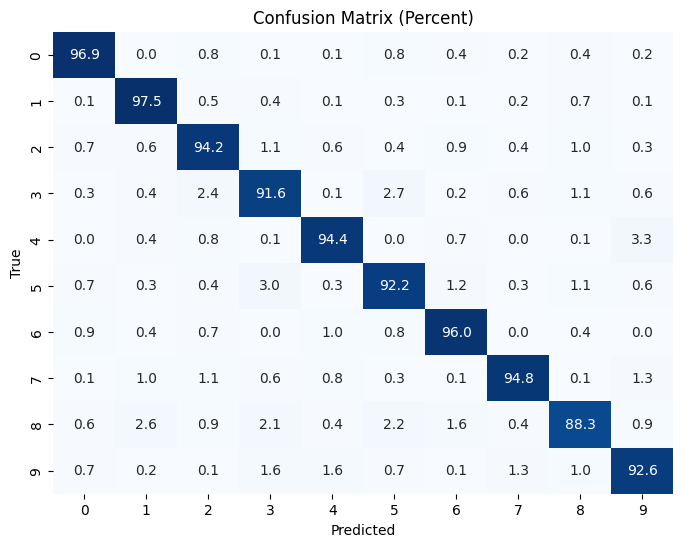

In [74]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained your model and have predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred_classes)

# Convert counts to percentages
confusion_percent = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis] * 100

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap with percentages
sns.heatmap(confusion_percent, annot=True, fmt='.1f', cmap='Blues', cbar=False, ax=ax)

# Set labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix (Percent)')

# Add class labels to the x and y axis
class_labels = [str(i) for i in range(10)]  # Assuming you have 10 classes
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

# Display the plot
plt.show()